## Задаем исходные данные

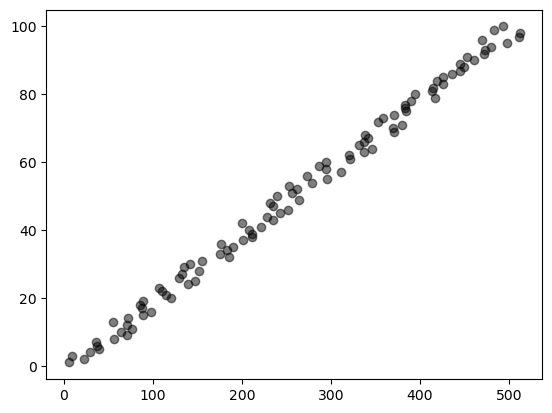

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.arange(1, 101)
Y = 5 * X + 7 + np.random.uniform(-20, 20, size=100) 

data = pd.DataFrame({'X': X, 'Y': Y})
plt.scatter(data['Y'], data['X'], color='black', label='Data points', alpha=0.5)

## Функция потерь

In [2]:
def loss_func(w, b, X, Y):
    return np.mean((w * X + b - Y)**2) / 2

w_beg, b_beg = 0, 0
beg_loss = loss_func(w_beg, b_beg, data['X'], data['Y'])
print(f"Initial Loss: {beg_loss}")

Initial Loss: 44108.86797279285


## Частные производные

In [3]:
def grad_w(w, b, X, Y):
    return np.mean((w * X + b - Y) * X)

def grad_b(w, b, X, Y):
    return np.mean(w * X + b - Y)

gradient_w = grad_w(w_beg, b_beg, data['X'], data['Y'])
gradient_b = grad_b(w_beg, b_beg, data['X'], data['Y'])
print(f"Gradient w: {gradient_w}, Gradient b: {gradient_b}")

Gradient w: -17263.173821383843, Gradient b: -259.7072349321152


## Градиентный спуск

In [4]:
lmbda = 0.0001
max_i = 10_000
w, b = 0, 0
i = 0

while i < max_i:
    gradient_w = grad_w(w, b, data['X'], data['Y'])
    gradient_b = grad_b(w, b, data['X'], data['Y'])
    
    w_new = w - lmbda * gradient_w
    b_new = b - lmbda * gradient_b
    
    if np.sqrt((w_new - w)**2 + (b_new - b)**2) < 0.001:
        break

    w, b = w_new, b_new
    i += 1

print(f"Optimized b: {b}, Optimized w: {w}")
print(f"Iterations: {i}")

Optimized b: 0.0799644487314823, Optimized w: 5.098990473949126
Iterations: 19


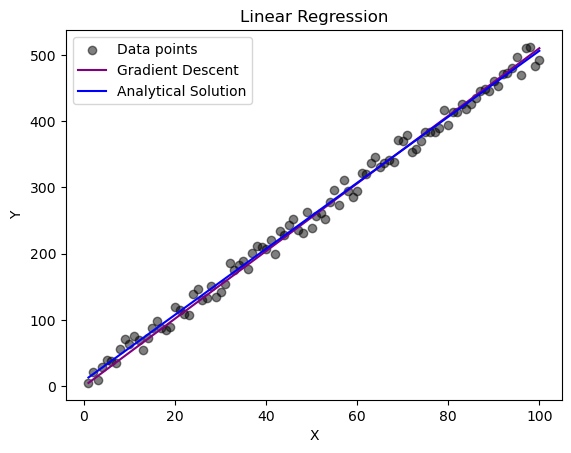

(4.978047953569789, 8.315813276840913)

In [5]:
model = LinearRegression()
model.fit(data[['X']], data['Y'])
analyt_w = model.coef_[0]
analyt_b = model.intercept_

plt.scatter(data['X'], data['Y'], color='black', label='Data points', alpha=0.5)
plt.plot(data['X'], w * data['X'] + b, color='purple', label='Gradient Descent')
plt.plot(data['X'], analyt_w * data['X'] + analyt_b, color='blue', label='Analytical Solution')
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

analyt_w, analyt_b